Gradient Boosting is similar to AdaBoosting in that it runs sequential models in an attempt to make each better than the previous.

The difference is that while Adaptive Boosting modifies the importance of wrongly predicted instances, Gradient Boosting creates a sequential model fit to the residual errors of the previous model. Then the models are added together (so the the first model is modified by adding the second model in to adjust for the errors).

Let's do an example without Scikit-learn to show us what is happening, and then we'll do one with it.

In [78]:
# First we need to import the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [79]:
# Lets create a parabolic dataset
np.random.seed(50)
X = np.random.rand(100,1) - 0.5
y = 5 * X[:,0]**2 + 0.15 * np.random.randn(100)

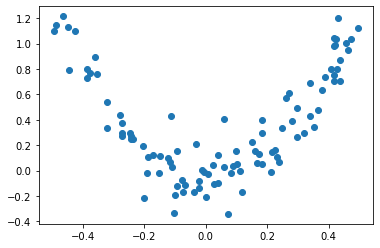

In [80]:
plt.scatter(X,y)

In [81]:
# Build a decision tree to predict
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X,y)
y_pred = tree_reg1.predict(X)

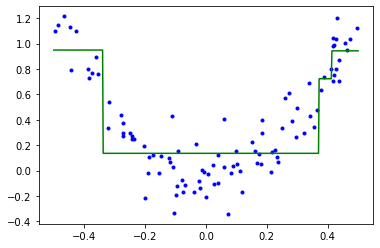

In [82]:
# Plot the prediction

## Create linear x values 
x_idx = np.linspace(-0.5, .5, 500)

## Run predictions for each of the linear x values (in order to create a line)
y_pred = tree_reg1.predict(x_idx.reshape(-1,1))

plt.plot(X[:,0],y,'b.')
plt.plot(x_idx, y_pred, 'g-')

The model above did not predict perfectly, so each instance has a residual error we can graph as so...

In [83]:
# Calculate residual error
residual_1 = y - tree_reg1.predict(X)

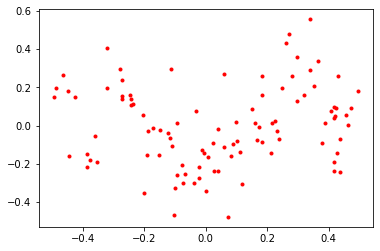

In [84]:
# Graph the error
plt.plot(X[:,0],residual_1,'r.')

Now we use this as a new dataset, and run a decision tree on this

In [85]:
# Build the model on the residuals
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, residual_1)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

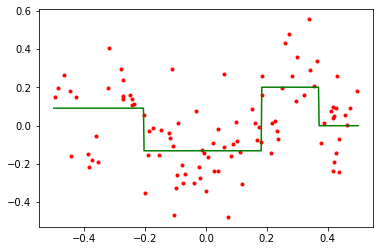

In [86]:
# Plot the prediction

## Create linear x values 
x_idx = np.linspace(-0.5, .5, 500)

## Run predictions for each of the linear x values (in order to create a line)
y_pred = tree_reg2.predict(x_idx.reshape(-1,1))

plt.plot(X[:,0],residual_1,'r.')
plt.plot(x_idx, y_pred, 'g-')

We can now predict a new instances by summing the models together

In [87]:
new_data = [[.01]]
y_pred = sum(tree.predict(new_data) for tree in (tree_reg1, tree_reg2))
y_pred

array([0.00452468])

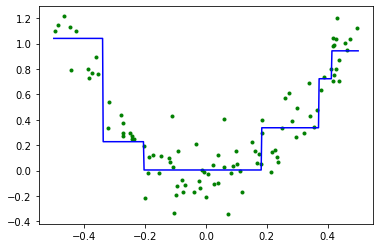

In [88]:
# Plot the combined models
# Plot the prediction

## Create linear x values 
x_idx = np.linspace(-0.5, .5, 500)

## Run predictions for each of the linear x values (in order to create a line)
y_pred = sum(tree.predict(x_idx.reshape(-1,1)) for tree in (tree_reg1, tree_reg2))

plt.plot(X[:,0],y,'g.')
plt.plot(x_idx, y_pred, 'b-')

## Gradient Boosting in Scikit-Learn

This can be run iteratively many times. It can also be done using `GradientBoostingRegressor`

In [89]:
from sklearn.ensemble import GradientBoostingRegressor

In [93]:
# Create and fit model
gb_reg = GradientBoostingRegressor(max_depth=2, n_estimators=2, learning_rate=1.0)
gb_reg.fit(X,y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=2,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

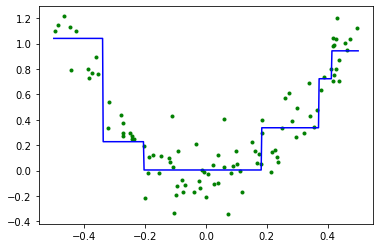

In [94]:
# Plot the combined models
# Plot the prediction

## Create linear x values 
x_idx = np.linspace(-0.5, .5, 500)

## Run predictions for each of the linear x values (in order to create a line)
y_pred = gb_reg.predict(x_idx.reshape(-1,1))

plt.plot(X[:,0],y,'g.')
plt.plot(x_idx, y_pred, 'b-')

## Preventing Overfitting

Too many estimators (iterations) can lead to overfitting

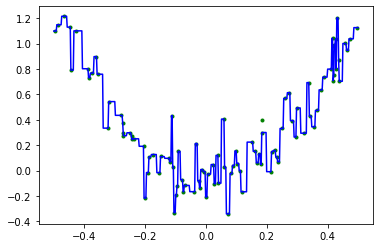

In [95]:
# Create and fit model
gb_reg = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate=1.0)
gb_reg.fit(X,y)

# Plot the combined models
# Plot the prediction

## Create linear x values 
x_idx = np.linspace(-0.5, .5, 500)

## Run predictions for each of the linear x values (in order to create a line)
y_pred = gb_reg.predict(x_idx.reshape(-1,1))

plt.plot(X[:,0],y,'g.')
plt.plot(x_idx, y_pred, 'b-')

We can create a validation dataset in order to test the model for overfitting. At each number of estimators, we can see if the error reduces in both the training and validation sets. Once we see the training error reducing but validation error increasing, we know that our model is overfitting and not becoming more accurate in actuality. At this point we can stop the model and use the number of estimators at that point. This is an example of early stopping.

In [96]:
# We need to import the splitter library as well as some metric to judge accuracy
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [97]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X,y)

In [98]:
# Build the model on the training set
gb_reg = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate=1.0)
gb_reg.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

`staged_predict()` returns an iterator over the predictions at each stage. So we can check the error at each stage. We 

We will feed the iterator (run on the validation set) to `y_pred`, and then grab the MSE from that and add it to an array called `errors`.

In [109]:
errors = [
    mean_squared_error(y_val, y_pred)
    for y_pred in gb_reg.staged_predict(X_val)
]

# Show a small subset of errors for example
errors[:5]

[0.07559238042759367,
 0.037870157610981406,
 0.04013169215862442,
 0.0344135178703093,
 0.03775237296969252]

In [111]:
# Find the index of the lowest error

# This will also be our best model, and because these are run sequentially, 
# it will also be the ideal number of estimators
np.argmin(errors[:5])

# Note, because that is an index, to get the actual number of estimators, we need to add 1.

3

In [113]:
best_n_estimator = np.argmin(errors) + 1
best_n_estimator

32

In [114]:
# Create the model using the ideal number of estimators
gb_reg_best = GradientBoostingRegressor(max_depth=2, n_estimators=best_n_estimator)
gb_reg_best.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=32,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

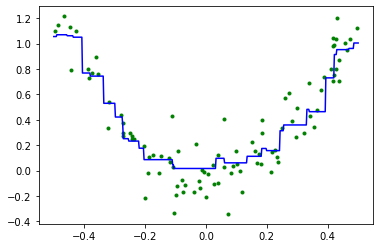

In [115]:
# Plot the combined models
# Plot the prediction

## Create linear x values 
x_idx = np.linspace(-0.5, .5, 500)

## Run predictions for each of the linear x values (in order to create a line)
y_pred = gb_reg_best.predict(x_idx.reshape(-1,1))

plt.plot(X[:,0],y,'g.')
plt.plot(x_idx, y_pred, 'b-')

## Sub samples (Stochastic Gradient Boosting)

You can even run gradient boosting by using a subsample of the training data (similar to bagging)

In [116]:
# Build a model which uses a random 25 of data at each estimator
gb_reg = GradientBoostingRegressor(max_depth=2, n_estimators=30, subsample=0.25)
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=30,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.25, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

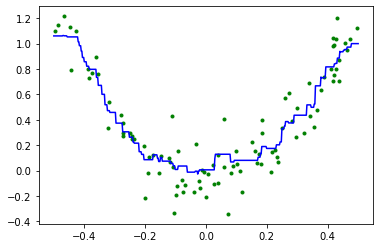

In [117]:
# Plot the combined models
# Plot the prediction

## Create linear x values 
x_idx = np.linspace(-0.5, .5, 500)

## Run predictions for each of the linear x values (in order to create a line)
y_pred = gb_reg.predict(x_idx.reshape(-1,1))

plt.plot(X[:,0],y,'g.')
plt.plot(x_idx, y_pred, 'b-')